In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

In [54]:
#filename = '/content/drive/My Drive/luna_lab/car_plate_sample/'
filename = './augmented_data/'

In [55]:
trans = torchvision.transforms.Compose([
                                        transforms.Resize((28,28)),
                                        transforms.Grayscale(),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5),(0.5))
                                        ])

In [56]:
dataset = torchvision.datasets.ImageFolder(root = filename,
                                        transform = trans)

In [57]:
classes = dataset.classes

In [59]:
validation_split = .3
shuffle_dataset = True
random_seed= 42

In [60]:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

In [61]:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=4, 
                                           sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=4,
                                                sampler=valid_sampler)

In [62]:
train_loader

In [63]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 82)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [66]:
log_interval = 200

In [67]:
for epoch in range(3):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % log_interval == 0:
            print('Train Epoch: {} Loss: {:.6f}'.format(
                epoch, loss.item()))

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Train Epoch: 0 Loss: 4.415698
Train Epoch: 0 Loss: 4.391868
Train Epoch: 0 Loss: 4.452860
Train Epoch: 0 Loss: 4.403625
Train Epoch: 0 Loss: 4.396571
Train Epoch: 0 Loss: 4.441628
Train Epoch: 0 Loss: 4.439106
Train Epoch: 0 Loss: 4.436814
Train Epoch: 0 Loss: 4.397657
Train Epoch: 0 Loss: 4.435940
Train Epoch: 0 Loss: 4.381792
Train Epoch: 0 Loss: 4.464326
Train Epoch: 0 Loss: 4.380085
Train Epoch: 0 Loss: 4.342606
Train Epoch: 0 Loss: 4.434551
Train Epoch: 0 Loss: 4.429726
Train Epoch: 0 Loss: 4.414618
Train Epoch: 0 Loss: 4.415133
Train Epoch: 0 Loss: 4.377451
Train Epoch: 0 Loss: 4.404613
Train Epoch: 0 Loss: 4.391792
Train Epoch: 0 Loss: 4.398518
Train Epoch: 0 Loss: 4.393108
Train Epoch: 0 Loss: 4.401031
Train Epoch: 0 Loss: 4.408781
Train Epoch: 0 Loss: 4.367861
Train Epoch: 0 Loss: 4.445252
Train Epoch: 0 Loss: 4.332288
Train Epoch: 0 Loss: 4.397339
Train Epoch: 0 Loss: 4.401896
Train Epoch: 0 Loss: 4.382998
Train Epoch: 0 Loss: 4.421855
Train Epoch: 0 Loss: 4.424144
Train Epoc

Train Epoch: 0 Loss: 0.042362
Train Epoch: 0 Loss: 0.195910
Train Epoch: 0 Loss: 0.002201
Train Epoch: 0 Loss: 0.183130
Train Epoch: 0 Loss: 0.866474
Train Epoch: 0 Loss: 0.780460
Train Epoch: 0 Loss: 0.032327
Train Epoch: 0 Loss: 0.011645
Train Epoch: 0 Loss: 0.179985
Train Epoch: 0 Loss: 0.019900
Train Epoch: 0 Loss: 0.887105
Train Epoch: 0 Loss: 1.030845
Train Epoch: 0 Loss: 0.021236
Train Epoch: 0 Loss: 0.048898
Train Epoch: 0 Loss: 0.470634
Train Epoch: 0 Loss: 0.006138
Train Epoch: 0 Loss: 0.071323
Train Epoch: 0 Loss: 0.028612
Train Epoch: 0 Loss: 0.002411
Train Epoch: 0 Loss: 0.023819
Train Epoch: 0 Loss: 1.441148
Train Epoch: 0 Loss: 0.026509
Train Epoch: 0 Loss: 0.126744
Train Epoch: 0 Loss: 0.000682
Train Epoch: 0 Loss: 0.014335
Train Epoch: 0 Loss: 0.594216
Train Epoch: 0 Loss: 0.172296
Train Epoch: 0 Loss: 0.026879
[1,  6000] loss: 0.223
Train Epoch: 0 Loss: 0.080640
Train Epoch: 0 Loss: 0.036478
Train Epoch: 0 Loss: 0.003049
Train Epoch: 0 Loss: 0.013431
Train Epoch: 0 Lo

Train Epoch: 0 Loss: 0.001847
Train Epoch: 0 Loss: 0.002137
Train Epoch: 0 Loss: 0.000517
Train Epoch: 0 Loss: 0.000107
Train Epoch: 0 Loss: 0.013981
Train Epoch: 0 Loss: 0.000300
Train Epoch: 0 Loss: 0.002883
Train Epoch: 0 Loss: 0.608732
Train Epoch: 0 Loss: 0.000138
Train Epoch: 0 Loss: 0.003379
Train Epoch: 0 Loss: 0.000851
Train Epoch: 0 Loss: 0.002328
Train Epoch: 0 Loss: 0.000338
Train Epoch: 0 Loss: 0.000198
Train Epoch: 0 Loss: 0.008845
Train Epoch: 0 Loss: 0.001684
Train Epoch: 0 Loss: 0.002422
Train Epoch: 0 Loss: 0.000081
Train Epoch: 0 Loss: 1.092364
Train Epoch: 0 Loss: 0.005214
Train Epoch: 0 Loss: 0.031889
Train Epoch: 0 Loss: 0.000066
Train Epoch: 0 Loss: 0.000476
Train Epoch: 0 Loss: 0.442977
Train Epoch: 0 Loss: 0.037234
Train Epoch: 0 Loss: 0.000362
Train Epoch: 0 Loss: 0.045918
Train Epoch: 0 Loss: 0.119859
Train Epoch: 0 Loss: 0.008692
Train Epoch: 0 Loss: 0.041080
Train Epoch: 0 Loss: 0.001022
Train Epoch: 0 Loss: 0.070971
Train Epoch: 0 Loss: 0.004627
Train Epoc

Train Epoch: 0 Loss: 0.001218
Train Epoch: 0 Loss: 0.001434
Train Epoch: 0 Loss: 0.003428
Train Epoch: 0 Loss: 0.015185
Train Epoch: 0 Loss: 0.000455
Train Epoch: 0 Loss: 0.008354
Train Epoch: 0 Loss: 0.000002
Train Epoch: 0 Loss: 0.000285
Train Epoch: 0 Loss: 0.000494
Train Epoch: 0 Loss: 0.000201
Train Epoch: 0 Loss: 0.000226
Train Epoch: 0 Loss: 0.005292
Train Epoch: 0 Loss: 0.016432
Train Epoch: 0 Loss: 0.000365
Train Epoch: 0 Loss: 0.000033
Train Epoch: 0 Loss: 0.000117
Train Epoch: 0 Loss: 0.000012
Train Epoch: 0 Loss: 0.000096
Train Epoch: 0 Loss: 0.004327
Train Epoch: 0 Loss: 0.001293
Train Epoch: 0 Loss: 0.004192
Train Epoch: 0 Loss: 0.000104
Train Epoch: 0 Loss: 0.001773
Train Epoch: 0 Loss: 0.004112
Train Epoch: 0 Loss: 0.001649
Train Epoch: 0 Loss: 0.000871
Train Epoch: 0 Loss: 0.142537
Train Epoch: 0 Loss: 0.006655
Train Epoch: 0 Loss: 0.000163
Train Epoch: 0 Loss: 0.000736
Train Epoch: 0 Loss: 0.000120
Train Epoch: 0 Loss: 0.000056
Train Epoch: 0 Loss: 0.001340
Train Epoc

Train Epoch: 1 Loss: 0.000077
Train Epoch: 1 Loss: 0.000068
Train Epoch: 1 Loss: 0.000110
Train Epoch: 1 Loss: 0.000170
Train Epoch: 1 Loss: 0.000022
Train Epoch: 1 Loss: 0.000041
Train Epoch: 1 Loss: 0.000029
Train Epoch: 1 Loss: 0.000092
Train Epoch: 1 Loss: 0.000032
Train Epoch: 1 Loss: 0.002660
Train Epoch: 1 Loss: 0.000058
Train Epoch: 1 Loss: 0.000338
Train Epoch: 1 Loss: 0.000248
Train Epoch: 1 Loss: 0.000095
Train Epoch: 1 Loss: 0.005419
Train Epoch: 1 Loss: 0.000008
Train Epoch: 1 Loss: 0.002224
Train Epoch: 1 Loss: 0.000008
Train Epoch: 1 Loss: 0.000038
Train Epoch: 1 Loss: 0.000717
[2,  2000] loss: 0.009
Train Epoch: 1 Loss: 0.000014
Train Epoch: 1 Loss: 0.000024
Train Epoch: 1 Loss: 0.001405
Train Epoch: 1 Loss: 0.008319
Train Epoch: 1 Loss: 0.000684
Train Epoch: 1 Loss: 0.000022
Train Epoch: 1 Loss: 0.000315
Train Epoch: 1 Loss: 0.000239
Train Epoch: 1 Loss: 0.000350
Train Epoch: 1 Loss: 0.000270
Train Epoch: 1 Loss: 0.000009
Train Epoch: 1 Loss: 0.000143
Train Epoch: 1 Lo

Train Epoch: 1 Loss: 0.000018
Train Epoch: 1 Loss: 0.000103
Train Epoch: 1 Loss: 0.000322
Train Epoch: 1 Loss: 0.000325
Train Epoch: 1 Loss: 0.004129
Train Epoch: 1 Loss: 0.000054
Train Epoch: 1 Loss: 0.001095
Train Epoch: 1 Loss: 0.000001
Train Epoch: 1 Loss: 0.001205
Train Epoch: 1 Loss: 0.000013
Train Epoch: 1 Loss: 0.000233
Train Epoch: 1 Loss: 0.000113
Train Epoch: 1 Loss: 0.000997
Train Epoch: 1 Loss: 0.002959
Train Epoch: 1 Loss: 0.000167
Train Epoch: 1 Loss: 0.000231
Train Epoch: 1 Loss: 0.000824
Train Epoch: 1 Loss: 0.000058
Train Epoch: 1 Loss: 0.000035
Train Epoch: 1 Loss: 0.001209
Train Epoch: 1 Loss: 0.000222
Train Epoch: 1 Loss: 0.026460
Train Epoch: 1 Loss: 0.000093
Train Epoch: 1 Loss: 0.000288
Train Epoch: 1 Loss: 0.000096
Train Epoch: 1 Loss: 0.015100
Train Epoch: 1 Loss: 0.000061
Train Epoch: 1 Loss: 0.000416
Train Epoch: 1 Loss: 0.000015
Train Epoch: 1 Loss: 0.000001
Train Epoch: 1 Loss: 0.000069
Train Epoch: 1 Loss: 0.000025
Train Epoch: 1 Loss: 0.002263
Train Epoc

Train Epoch: 1 Loss: 0.000089
Train Epoch: 1 Loss: 0.000042
Train Epoch: 1 Loss: 0.000059
Train Epoch: 1 Loss: 0.000186
Train Epoch: 1 Loss: 0.000007
Train Epoch: 1 Loss: 0.000020
Train Epoch: 1 Loss: 0.000579
Train Epoch: 1 Loss: 0.000079
Train Epoch: 1 Loss: 0.000054
Train Epoch: 1 Loss: 0.000424
Train Epoch: 1 Loss: 0.000059
Train Epoch: 1 Loss: 0.000010
Train Epoch: 1 Loss: 0.000011
Train Epoch: 1 Loss: 0.008912
Train Epoch: 1 Loss: 0.000085
Train Epoch: 1 Loss: 0.000005
Train Epoch: 1 Loss: 0.000753
Train Epoch: 1 Loss: 0.000437
Train Epoch: 1 Loss: 0.000507
Train Epoch: 1 Loss: 0.000222
Train Epoch: 1 Loss: 0.000319
Train Epoch: 1 Loss: 0.000080
Train Epoch: 1 Loss: 0.000331
Train Epoch: 1 Loss: 0.000751
Train Epoch: 1 Loss: 0.004984
Train Epoch: 1 Loss: 0.000980
Train Epoch: 1 Loss: 0.000183
Train Epoch: 1 Loss: 0.000286
Train Epoch: 1 Loss: 0.000007
Train Epoch: 1 Loss: 0.000017
Train Epoch: 1 Loss: 0.000296
Train Epoch: 1 Loss: 0.000349
Train Epoch: 1 Loss: 0.000533
Train Epoc

Train Epoch: 1 Loss: 0.001372
Train Epoch: 1 Loss: 0.001116
Train Epoch: 1 Loss: 0.000124
Train Epoch: 1 Loss: 0.000035
Train Epoch: 1 Loss: 0.000193
Train Epoch: 1 Loss: 0.000035
[2, 18000] loss: 0.001
Train Epoch: 1 Loss: 0.000049
Train Epoch: 1 Loss: 0.000054
Train Epoch: 1 Loss: 0.000004
Train Epoch: 1 Loss: 0.000010
Train Epoch: 1 Loss: 0.000002
Train Epoch: 1 Loss: 0.000062
Train Epoch: 1 Loss: 0.000096
Train Epoch: 1 Loss: 0.000066
Train Epoch: 1 Loss: 0.000036
Train Epoch: 1 Loss: 0.000079
Train Epoch: 1 Loss: 0.000014
Train Epoch: 1 Loss: 0.000123
Train Epoch: 1 Loss: 0.000030
Train Epoch: 1 Loss: 0.000018
Train Epoch: 1 Loss: 0.000712
Train Epoch: 1 Loss: 0.000017
Train Epoch: 1 Loss: 0.000026
Train Epoch: 1 Loss: 0.000010
Train Epoch: 1 Loss: 0.000002
Train Epoch: 1 Loss: 0.000127
Train Epoch: 1 Loss: 0.000023
Train Epoch: 1 Loss: 0.000086
Train Epoch: 1 Loss: 0.000006
Train Epoch: 1 Loss: 0.000015
Train Epoch: 1 Loss: 0.000528
Train Epoch: 1 Loss: 0.000018
Train Epoch: 1 Lo

Train Epoch: 2 Loss: 0.000011
Train Epoch: 2 Loss: 0.000000
Train Epoch: 2 Loss: 0.000270
Train Epoch: 2 Loss: 0.000266
Train Epoch: 2 Loss: 0.000108
Train Epoch: 2 Loss: 0.000028
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000253
Train Epoch: 2 Loss: 0.000178
Train Epoch: 2 Loss: 0.003278
Train Epoch: 2 Loss: 0.003547
Train Epoch: 2 Loss: 0.000043
Train Epoch: 2 Loss: 0.000037
Train Epoch: 2 Loss: 0.000042
Train Epoch: 2 Loss: 0.000005
Train Epoch: 2 Loss: 0.000506
Train Epoch: 2 Loss: 0.000008
Train Epoch: 2 Loss: 0.000032
Train Epoch: 2 Loss: 0.000030
Train Epoch: 2 Loss: 0.000777
Train Epoch: 2 Loss: 0.000024
Train Epoch: 2 Loss: 0.001316
Train Epoch: 2 Loss: 0.000050
Train Epoch: 2 Loss: 0.000025
Train Epoch: 2 Loss: 0.000002
Train Epoch: 2 Loss: 0.004917
Train Epoch: 2 Loss: 0.000032
Train Epoch: 2 Loss: 0.000038
Train Epoch: 2 Loss: 0.000118
Train Epoch: 2 Loss: 0.000036
Train Epoch: 2 Loss: 0.003998
Train Epoch: 2 Loss: 0.000015
Train Epoch: 2 Loss: 0.000056
Train Epoc

Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000011
Train Epoch: 2 Loss: 0.000004
Train Epoch: 2 Loss: 0.000046
Train Epoch: 2 Loss: 0.000825
Train Epoch: 2 Loss: 0.002176
Train Epoch: 2 Loss: 0.000089
Train Epoch: 2 Loss: 0.000021
Train Epoch: 2 Loss: 0.000255
Train Epoch: 2 Loss: 0.000030
Train Epoch: 2 Loss: 0.000005
Train Epoch: 2 Loss: 0.000030
Train Epoch: 2 Loss: 0.000004
Train Epoch: 2 Loss: 0.000019
Train Epoch: 2 Loss: 0.000005
Train Epoch: 2 Loss: 0.000020
Train Epoch: 2 Loss: 0.000008
Train Epoch: 2 Loss: 0.000016
Train Epoch: 2 Loss: 0.000354
Train Epoch: 2 Loss: 0.026493
Train Epoch: 2 Loss: 0.000124
Train Epoch: 2 Loss: 0.000009
Train Epoch: 2 Loss: 0.000031
Train Epoch: 2 Loss: 0.000002
Train Epoch: 2 Loss: 0.000022
Train Epoch: 2 Loss: 0.000029
Train Epoch: 2 Loss: 0.000012
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000003
Train Epoch: 2 Loss: 0.000311
Train Epoch: 2 Loss: 0.000305
Train Epoch: 2 Loss: 0.000110
Train Epoc

Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000063
Train Epoch: 2 Loss: 0.000034
Train Epoch: 2 Loss: 0.000012
Train Epoch: 2 Loss: 0.000074
Train Epoch: 2 Loss: 0.000288
Train Epoch: 2 Loss: 0.000017
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000042
Train Epoch: 2 Loss: 0.000019
Train Epoch: 2 Loss: 0.000182
Train Epoch: 2 Loss: 0.000255
Train Epoch: 2 Loss: 0.002180
Train Epoch: 2 Loss: 0.000010
Train Epoch: 2 Loss: 0.000030
Train Epoch: 2 Loss: 0.000066
Train Epoch: 2 Loss: 0.000020
Train Epoch: 2 Loss: 0.000109
Train Epoch: 2 Loss: 0.000009
Train Epoch: 2 Loss: 0.000008
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000009
Train Epoch: 2 Loss: 0.000002
Train Epoch: 2 Loss: 0.000000
Train Epoch: 2 Loss: 0.000012
Train Epoch: 2 Loss: 0.001821
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000011
Train Epoch: 2 Loss: 0.000012
Train Epoch: 2 Loss: 0.000036
Train Epoch: 2 Loss: 0.000665
Train Epoch: 2 Loss: 0.000399
Train Epoch: 2 Loss: 0.000138
Train Epoc

Train Epoch: 2 Loss: 0.000259
Train Epoch: 2 Loss: 0.000334
Train Epoch: 2 Loss: 0.000109
Train Epoch: 2 Loss: 0.000006
Train Epoch: 2 Loss: 0.001325
Train Epoch: 2 Loss: 0.000084
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000040
Train Epoch: 2 Loss: 0.000007
Train Epoch: 2 Loss: 0.000088
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000006
Train Epoch: 2 Loss: 0.000090
Train Epoch: 2 Loss: 0.000013
Train Epoch: 2 Loss: 0.000003
Train Epoch: 2 Loss: 0.000024
Train Epoch: 2 Loss: 0.000003
Train Epoch: 2 Loss: 0.000000
Train Epoch: 2 Loss: 0.000014
Train Epoch: 2 Loss: 0.000014
Train Epoch: 2 Loss: 0.000005
Train Epoch: 2 Loss: 0.000011
Train Epoch: 2 Loss: 0.000003
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000025
Train Epoch: 2 Loss: 0.000097
[3, 20000] loss: 0.000
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000002
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Loss: 0.000139
Train Epoch: 2 Loss: 0.000001
Train Epoch: 2 Lo

Train Epoch: 3 Loss: 0.000300
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000021
Train Epoch: 3 Loss: 0.000074
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000054
Train Epoch: 3 Loss: 0.000009
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000027
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000035
Train Epoch: 3 Loss: 0.000326
Train Epoch: 3 Loss: 0.000014
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000116
Train Epoch: 3 Loss: 0.000166
Train Epoch: 3 Loss: 0.000017
Train Epoch: 3 Loss: 0.000004
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000045
Train Epoch: 3 Loss: 0.000007
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000128
Train Epoch: 3 Loss: 0.000003
Train Epoch: 3 Loss: 0.000006
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000093
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000171
Train Epoch: 3 Loss: 0.000005
Train Epoc

Train Epoch: 3 Loss: 0.000004
Train Epoch: 3 Loss: 0.000159
Train Epoch: 3 Loss: 0.000012
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000451
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000077
Train Epoch: 3 Loss: 0.000003
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000006
Train Epoch: 3 Loss: 0.000015
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000067
Train Epoch: 3 Loss: 0.000067
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000281
Train Epoch: 3 Loss: 0.000008
Train Epoch: 3 Loss: 0.000003
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000008
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000027
Train Epoch: 3 Loss: 0.000003
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000009
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000007
Train Epoch: 3 Loss: 0.000022
Train Epoc

Train Epoch: 3 Loss: 0.000055
Train Epoch: 3 Loss: 0.000005
Train Epoch: 3 Loss: 0.000405
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000150
Train Epoch: 3 Loss: 0.000031
Train Epoch: 3 Loss: 0.000071
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000048
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000007
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000011
[4, 16000] loss: 0.000
Train Epoch: 3 Loss: 0.000000
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000108
Train Epoch: 3 Loss: 0.000012
Train Epoch: 3 Loss: 0.000009
Train Epoch: 3 Loss: 0.000010
Train Epoch: 3 Loss: 0.000002
Train Epoch: 3 Loss: 0.000001
Train Epoch: 3 Loss: 0.000057
Train Epoch: 3 Loss: 0.000005
Train Epoch: 3 Loss: 0.000003
Train Epoch: 3 Loss: 0.000031
Train Epoch: 3 Loss: 0.000004
Train Epoch: 3 Lo

Train Epoch: 4 Loss: 0.000024
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000020
Train Epoch: 4 Loss: 0.000014
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000020
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000003
Train Epoch: 4 Loss: 0.000009
Train Epoch: 4 Loss: 0.000030
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000010
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000003
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000066
Train Epoch: 4 Loss: 0.000021
Train Epoch: 4 Loss: 0.000106
Train Epoch: 4 Loss: 0.000011
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000010
Train Epoch: 4 Loss: 0.000091
Train Epoch: 4 Loss: 0.000031
Train Epoch: 4 Loss: 0.000007
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000009
Train Epoch: 4 Loss: 0.000000
Train Epoc

Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000040
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000336
Train Epoch: 4 Loss: 0.000061
Train Epoch: 4 Loss: 0.000004
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000132
Train Epoch: 4 Loss: 0.000007
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000126
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000005
Train Epoch: 4 Loss: 0.000003
Train Epoch: 4 Loss: 0.000049
Train Epoch: 4 Loss: 0.000003
Train Epoch: 4 Loss: 0.000035
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000025
Train Epoch: 4 Loss: 0.000003
Train Epoch: 4 Loss: 0.000004
Train Epoch: 4 Loss: 0.000226
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000003
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000001
Train Epoc

Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000004
Train Epoch: 4 Loss: 0.000014
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000005
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000047
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000297
[5, 12000] loss: 0.000
Train Epoch: 4 Loss: 0.000009
Train Epoch: 4 Loss: 0.000022
Train Epoch: 4 Loss: 0.000006
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000005
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000038
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000004
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000008
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000006
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000008
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000003
Train Epoch: 4 Lo

Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000024
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000004
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000018
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000012
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000074
Train Epoch: 4 Loss: 0.000051
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000036
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000027
Train Epoch: 4 Loss: 0.000000
Train Epoch: 4 Loss: 0.000080
Train Epoch: 4 Loss: 0.000001
Train Epoch: 4 Loss: 0.000011
Train Epoch: 4 Loss: 0.000007
Train Epoch: 4 Loss: 0.000009
Train Epoch: 4 Loss: 0.000003
Train Epoch: 4 Loss: 0.000019
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000005
Train Epoch: 4 Loss: 0.000002
Train Epoch: 4 Loss: 0.000011
Train Epoc

Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000023
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000003
Train Epoch: 5 Loss: 0.000004
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000369
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000006
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000025
Train Epoch: 5 Loss: 0.000004
Train Epoch: 5 Loss: 0.000059
Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000096
Train Epoch: 5 Loss: 0.000160
Train Epoch: 5 Loss: 0.000008
Train Epoch: 5 Loss: 0.000178
Train Epoch: 5 Loss: 0.000038
Train Epoch: 5 Loss: 0.000003
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000069
Train Epoch: 5 Loss: 0.000014
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000001
Train Epoc

Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000006
Train Epoch: 5 Loss: 0.000001
[6,  8000] loss: 0.000
Train Epoch: 5 Loss: 0.000103
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000030
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000006
Train Epoch: 5 Loss: 0.000013
Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000010
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000090
Train Epoch: 5 Loss: 0.000027
Train Epoch: 5 Loss: 0.000033
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000681
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000014
Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000500
Train Epoch: 5 Loss: 0.000212
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000129
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Lo

Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000005
Train Epoch: 5 Loss: 0.000003
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000005
Train Epoch: 5 Loss: 0.000452
Train Epoch: 5 Loss: 0.000009
Train Epoch: 5 Loss: 0.000102
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000040
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000007
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000015
Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000058
Train Epoch: 5 Loss: 0.000008
Train Epoch: 5 Loss: 0.000004
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000013
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000011
Train Epoch: 5 Loss: 0.000004
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000003
Train Epoch: 5 Loss: 0.000001
[6, 14000] loss: 0.000
Train Epoch: 5 Lo

Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000004
Train Epoch: 5 Loss: 0.000018
Train Epoch: 5 Loss: 0.000010
Train Epoch: 5 Loss: 0.000023
Train Epoch: 5 Loss: 0.000005
Train Epoch: 5 Loss: 0.000009
Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000064
Train Epoch: 5 Loss: 0.000003
Train Epoch: 5 Loss: 0.000013
Train Epoch: 5 Loss: 0.000009
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000002
Train Epoch: 5 Loss: 0.000020
Train Epoch: 5 Loss: 0.000016
Train Epoch: 5 Loss: 0.000013
Train Epoch: 5 Loss: 0.000001
Train Epoch: 5 Loss: 0.000009
Train Epoch: 5 Loss: 0.000144
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000008
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.000215
Train Epoch: 5 Loss: 0.000000
Train Epoch: 5 Loss: 0.001149
Train Epoc

Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000028
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000005
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000291
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000033
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000084
Train Epoch: 6 Loss: 0.000010
Train Epoch: 6 Loss: 0.000048
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000186
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000002
Train Epoch: 6 Loss: 0.000043
Train Epoch: 6 Loss: 0.000587
Train Epoch: 6 Loss: 0.000016
Train Epoch: 6 Loss: 0.000595
Train Epoch: 6 Loss: 0.000030
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000122
Train Epoch: 6 Loss: 0.000015
Train Epoch: 6 Loss: 0.000004
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000012
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000232
Train Epoch: 6 Loss: 0.000016
Train Epoc

Train Epoch: 6 Loss: 0.000007
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000758
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000009
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000213
Train Epoch: 6 Loss: 0.000005
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000039
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000010
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000011
Train Epoch: 6 Loss: 0.000002
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000031
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000000
[7, 10000] loss: 0.000
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000122
Train Epoch: 6 Loss: 0.000005
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000002
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Lo

Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000002
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000005
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000085
Train Epoch: 6 Loss: 0.000424
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000004
Train Epoch: 6 Loss: 0.000283
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000003
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000003
Train Epoch: 6 Loss: 0.000004
Train Epoch: 6 Loss: 0.000000
Train Epoch: 6 Loss: 0.000009
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000002
Train Epoch: 6 Loss: 0.000003
Train Epoch: 6 Loss: 0.000048
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000008
Train Epoch: 6 Loss: 0.000204
Train Epoch: 6 Loss: 0.000001
Train Epoch: 6 Loss: 0.000292
Train Epoch: 6 Loss: 0.000025
Train Epoch: 6 Loss: 0.000013
Train Epoch: 6 Loss: 0.000689
Train Epoc

Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000022
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000099
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000009
Train Epoch: 7 Loss: 0.000005
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000003
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000186
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000008
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000034
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000008
Train Epoch: 7 Loss: 0.000001
Train Epoc

Train Epoch: 7 Loss: 0.000027
Train Epoch: 7 Loss: 0.000098
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000009
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000012
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000008
Train Epoch: 7 Loss: 0.000006
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000001
[8,  6000] loss: 0.000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000031
Train Epoch: 7 Loss: 0.000007
Train Epoch: 7 Loss: 0.000011
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000004
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000006
Train Epoch: 7 Lo

Train Epoch: 7 Loss: 0.000003
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000010
Train Epoch: 7 Loss: 0.000115
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000016
Train Epoch: 7 Loss: 0.000008
Train Epoch: 7 Loss: 0.000029
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000018
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000004
Train Epoch: 7 Loss: 0.000004
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000054
Train Epoch: 7 Loss: 0.000006
Train Epoch: 7 Loss: 0.000007
Train Epoch: 7 Loss: 0.000011
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000208
Train Epoc

Train Epoch: 7 Loss: 0.000064
Train Epoch: 7 Loss: 0.000010
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000003
Train Epoch: 7 Loss: 0.000019
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000078
Train Epoch: 7 Loss: 0.000009
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000008
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000166
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000087
Train Epoch: 7 Loss: 0.000036
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000023
Train Epoch: 7 Loss: 0.000003
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000144
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000001
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000002
Train Epoch: 7 Loss: 0.000000
Train Epoch: 7 Loss: 0.000001
Train Epoc

Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000119
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000007
[9,  2000] loss: 0.000
Train Epoch: 8 Loss: 0.000011
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000005
Train Epoch: 8 Loss: 0.000005
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000536
Train Epoch: 8 Loss: 0.000023
Train Epoch: 8 Loss: 0.000021
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000008
Train Epoch: 8 Loss: 0.000023
Train Epoch: 8 Loss: 0.000034
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000029
Train Epoch: 8 Lo

Train Epoch: 8 Loss: 0.000103
Train Epoch: 8 Loss: 0.000040
Train Epoch: 8 Loss: 0.000045
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000004
Train Epoch: 8 Loss: 0.000009
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000023
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000004
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000007
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000004
Train Epoch: 8 Loss: 0.000068
Train Epoch: 8 Loss: 0.000006
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000019
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000008
Train Epoch: 8 Loss: 0.000029
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000074
Train Epoch: 8 Loss: 0.000000
Train Epoc

Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000030
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000059
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000035
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000004
Train Epoch: 8 Loss: 0.000007
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000085
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000001
Train Epoch: 8 Loss: 0.000038
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000060
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000000
Train Epoc

Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000002
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000000
Train Epoch: 8 Loss: 0.000003
Train Epoch: 8 Loss: 0.000001


KeyboardInterrupt: 

In [68]:
PATH = './car_net.pth'
torch.save(net.state_dict(), PATH)

In [69]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

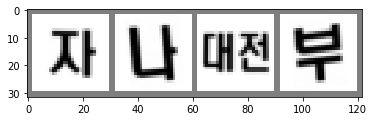

GroundTruth:     wk    sk     f    qn


In [71]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [72]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [73]:
outputs = net(images)

In [74]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

Predicted:     wk


In [79]:
correct = 0
total = 0
with torch.no_grad():
    for data in tqdm(test_loader):
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy : %d %%' % (100 * correct / total))

100%|██████████████████████████████████████████████████████████████████████████████| 8615/8615 [01:53<00:00, 76.05it/s]

Accuracy : 99 %
